<a href="https://colab.research.google.com/github/Chrln165/cookie/blob/master/DicodingCharleenSuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Charleen

Alamat: Jakarta Barat (DKI Jakarta)

Email: charleench165@gmail.com

TTL: 16 Mei 2001

Berikut submission saya untuk program Belajar Machine Learning Untuk Pemula dari Dicoding.

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-03 16:30:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.34MB/s    in 47s     

2020-11-03 16:31:00 (6.59 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
import os

In [ ]:
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images', 'rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [ ]:
dirBase = '/tmp/rockpaperscissors'
dirTrain = os.path.join(dirBase, 'train')
dirVal = os.path.join(dirBase, 'val')

In [ ]:
os.mkdir(dirTrain)
os.mkdir(dirVal)

In [ ]:
dirRock = os.path.join(dirBase, 'rock')
dirScissors = os.path.join(dirBase, 'scissors')
dirPaper = os.path.join(dirBase, 'paper')

In [ ]:
#pecah jd train & validation
Train_dirRock, Val_dirRock = train_test_split(os.listdir(dirRock), test_size = 0.4)

In [ ]:
Train_dirScissors, Val_dirScissors = train_test_split(os.listdir(dirScissors), test_size = 0.4)

In [ ]:
Train_dirPaper, Val_dirPaper = train_test_split(os.listdir(dirPaper), test_size = 0.4)

In [ ]:
TrainRock = os.path.join(dirTrain, 'rock')
TrainScissors = os.path.join(dirTrain, 'scissors')
TrainPaper = os.path.join(dirTrain, 'paper')

In [ ]:
ValRock = os.path.join(dirVal, 'rock')
ValScissors = os.path.join(dirVal, 'scissors')
ValPaper = os.path.join(dirVal, 'paper')

In [ ]:
#bikin directory dalam train dan validation
if not os.path.exists(TrainRock): os.mkdir(TrainRock)
if not os.path.exists(TrainScissors): os.mkdir(TrainScissors)
if not os.path.exists(TrainPaper): os.mkdir(TrainPaper)

In [ ]:
if not os.path.exists(ValRock): os.mkdir(ValRock)
if not os.path.exists(ValScissors): os.mkdir(ValScissors)
if not os.path.exists(ValPaper): os.mkdir(ValPaper)

In [ ]:
import shutil

In [ ]:
#copy data ke directory baru
for x in Train_dirRock:
  shutil.copy(os.path.join(dirRock, x), 
              os.path.join(TrainRock, x))
for x in Train_dirScissors:
  shutil.copy(os.path.join(dirScissors, x), 
              os.path.join(TrainScissors, x))  
for x in Train_dirPaper:
  shutil.copy(os.path.join(dirPaper, x), 
              os.path.join(TrainPaper, x)) 

In [ ]:
for x in Val_dirRock:
  shutil.copy(os.path.join(dirRock, x), 
              os.path.join(ValRock, x))
for x in Val_dirScissors:
  shutil.copy(os.path.join(dirScissors, x), 
              os.path.join(ValScissors, x))  
for x in Val_dirPaper:
  shutil.copy(os.path.join(dirPaper, x), 
              os.path.join(ValPaper, x))

bagian ini saya mencontoh **latihan membuat klasifikasi gambar** dari **dicoding**, jadi mungkin terdapat kesamaan. mohon dimaklumi.

In [ ]:
# data img generator
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    horizontal_flip = True,
    rotation_range = 20,
    fill_mode = 'nearest',
    shear_range = 0.2,
    zoom_range = 0.2)

In [ ]:
val_datagen = ImageDataGenerator(
    rescale = 1./225,
    horizontal_flip = True,
    rotation_range = 20,
    fill_mode = 'nearest',
    shear_range = 0.2,
    zoom_range = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    dirTrain,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical')

Found 1312 images belonging to 3 classes.


In [ ]:
val_generator = val_datagen.flow_from_directory(
    dirVal,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical')

Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential(
  [tf.keras.layers.Conv2D(32, 
                         (3,3), 
                         activation = 'relu', 
                         input_shape = (150,150,3)), 
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, 
                         (3,3), 
                         activation = 'relu'), 
  tf.keras.layers.MaxPooling2D(2,2), 
  tf.keras.layers.Conv2D(128, 
                         (3,3), 
                         activation = 'relu'), 
  tf.keras.layers.MaxPooling2D(2,2), 
  tf.keras.layers.Conv2D(256, 
                         (3,3), 
                         activation = 'relu'), 
  tf.keras.layers.MaxPooling2D(2,2), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(512, 
                        activation = 'relu'), 
  tf.keras.layers.Dense(3, 
                        activation = 'softmax')]
  )

In [ ]:
model.compile(metrics = ['accuracy'], 
              loss = 'categorical_crossentropy', 
              optimizer = tf.optimizers.Adam())

In [ ]:
history = model.fit(
    train_generator, 
    steps_per_epoch = 25, 
    epochs = 20, 
    validation_data = val_generator, 
    validation_steps = 5, 
    verbose = 2)

Epoch 1/20
25/25 - 43s - loss: 1.1606 - accuracy: 0.3262 - val_loss: 1.0942 - val_accuracy: 0.3063
Epoch 2/20
25/25 - 46s - loss: 0.9676 - accuracy: 0.5200 - val_loss: 0.8088 - val_accuracy: 0.7125
Epoch 3/20
25/25 - 43s - loss: 0.4946 - accuracy: 0.8313 - val_loss: 0.2990 - val_accuracy: 0.8938
Epoch 4/20
25/25 - 43s - loss: 0.3536 - accuracy: 0.8662 - val_loss: 0.3510 - val_accuracy: 0.8500
Epoch 5/20
25/25 - 43s - loss: 0.2949 - accuracy: 0.8938 - val_loss: 0.3273 - val_accuracy: 0.8938
Epoch 6/20
25/25 - 42s - loss: 0.2887 - accuracy: 0.8913 - val_loss: 0.1818 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 43s - loss: 0.2127 - accuracy: 0.9237 - val_loss: 0.2278 - val_accuracy: 0.9250
Epoch 8/20
25/25 - 43s - loss: 0.1893 - accuracy: 0.9450 - val_loss: 0.1151 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 43s - loss: 0.2070 - accuracy: 0.9337 - val_loss: 0.1417 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 43s - loss: 0.1372 - accuracy: 0.9638 - val_loss: 0.0991 - val_accuracy: 0.9563
Epoch 11/

Saving 1042420.jpg to 1042420.jpg
1042420.jpg
paper


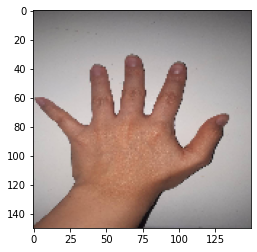

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  
  print(fn)
  if classes[0,0] != 0:
    print('paper')
  elif classes[0,1] != 0:
    print('rock')
  else:
    print('scissors')

Sekian jawaban ini saya lampirkan, mohon dimaklumi apabila ada kesalahan. Terima kasih banyak kak, semoga selalu diberkati.